In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

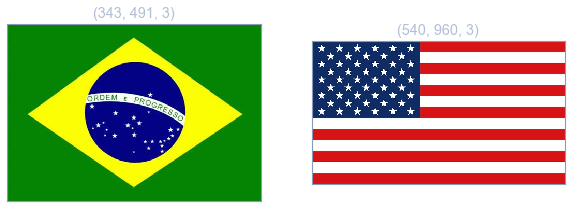

In [2]:
im = cv2.imread('bandeira_brasil.jpeg')
im_color = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.imread('bandeira_eua.jpg')
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(im_color)
plt.title(im_color.shape)
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(im_gray, cmap='gray')
plt.title(im_gray.shape)
plt.xticks([]), plt.yticks([])
plt.show()

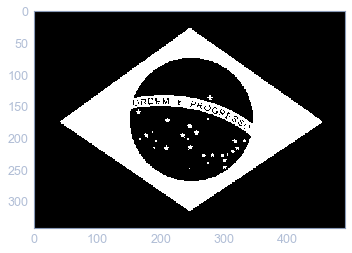

In [3]:
_, thresh1 = cv2.threshold(im_color[:,:,0], 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray');

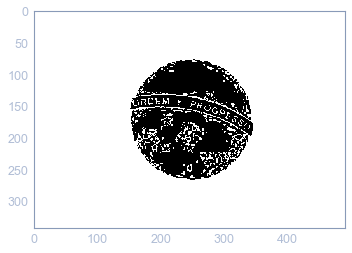

In [4]:
_, thresh2 = cv2.threshold(im_color[:,:,2], 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh2, cmap='gray');

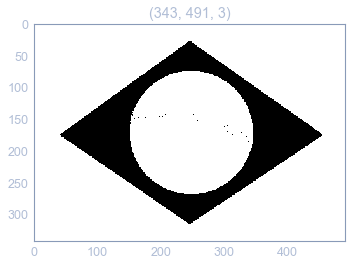

In [5]:
mask = cv2.bitwise_and(thresh1, thresh2)
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
mask = cv2.bitwise_not(mask)
plt.title(mask.shape)
plt.imshow(mask)

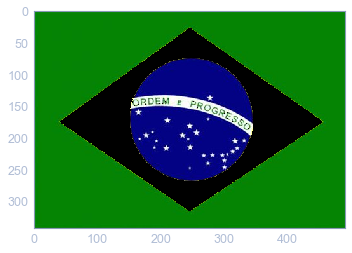

In [21]:
brasil = cv2.bitwise_and(im_color, mask)
plt.imshow(brasil)

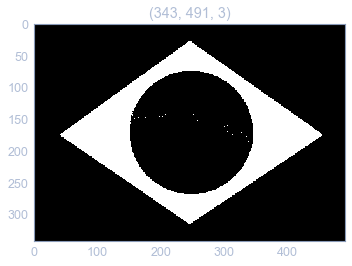

In [7]:
mask2 = cv2.bitwise_not(mask)
plt.title(mask2.shape)
plt.imshow(mask2)

In [17]:
im_gray = cv2.resize(im_gray, (mask2.shape[1], mask2.shape[0]))

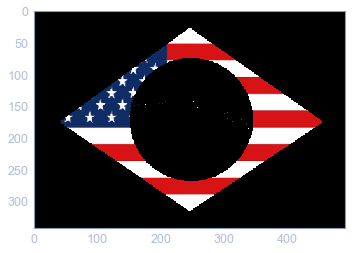

In [22]:
eua = cv2.bitwise_and(im_gray, mask2)
plt.imshow(eua)

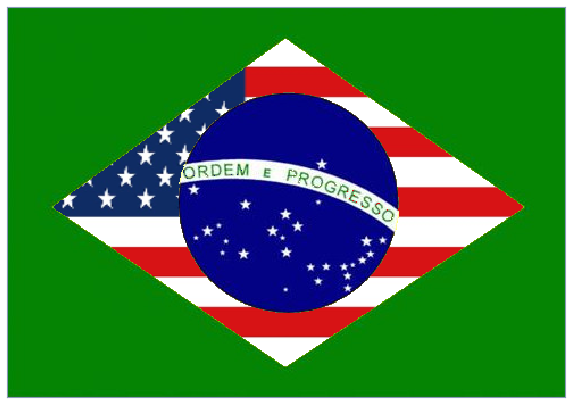

In [25]:
plt.figure(figsize=(10,8))
plt.imshow(cv2.add(eua, brasil))
plt.xticks([]), plt.yticks([])
plt.show()